In [ ]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import  ImageDataGenerator as Imgen

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 97% 144M/149M [00:00<00:00, 199MB/s]
100% 149M/149M [00:00<00:00, 183MB/s]


In [ ]:
!unzip -q brain-tumor-mri-dataset.zip

In [ ]:
#Augmenting the training dataset
traingen = Imgen(
                 rescale=1./255,
                 horizontal_flip=True,
                 validation_split=0.15)
#Augmenting the testing dataset
testgen = Imgen(# rescale the images to 1./255
                rescale = 1./255,
                horizontal_flip=True
                )

In [ ]:
trainds = traingen.flow_from_directory("Training/",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 16,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory("Training",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     subset="validation"
                                      )
testds = testgen.flow_from_directory("Testing",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     shuffle=False)

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
c = trainds.class_indices
classes = list(c.keys())
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
x,y = next(trainds)                             #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 #size of the plot
    for i in range(16):                         #16 images
        plt.subplot(4,4,i+1)                    #4 by 4 plot
        plt.imshow(x[i])                        #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show()                                  #shows the figure or plot

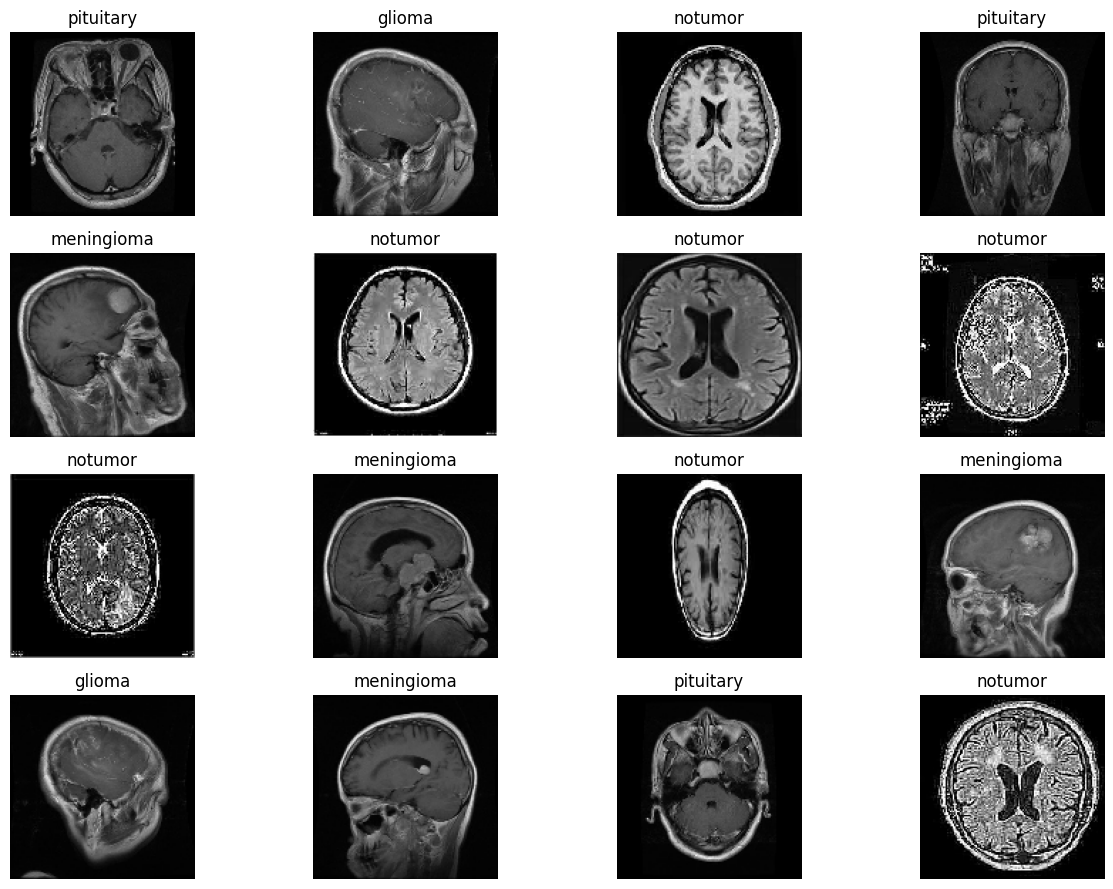

In [ ]:
#Call the plotImages function
plotImages(x,y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation,Dropout, BatchNormalization
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

cnn = Sequential([
    # First convolutional block
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(130, 130, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flattening the layers
    Flatten(),

    # Fully connected block
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),

    # Output layer
    Dense(4, activation='softmax')  # Assuming 4 classes for classification
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 130, 130, 32)      896       
                                                                 
 batch_normalization_48 (Ba  (None, 130, 130, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 65, 65, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 65, 65, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 65, 65, 64)        18496     
                                                                 
 batch_normalization_49 (Ba  (None, 65, 65, 64)      

In [ ]:
cnn.compile(loss="categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [ ]:
history = cnn.fit(trainds,validation_data=valds,epochs=20, batch_size=16, verbose=1)

Epoch 1/20
304/304 [==============================] - 17s 43ms/step - loss: 0.7868 - accuracy: 0.6844 - val_loss: 3.2582 - val_accuracy: 0.2550
Epoch 2/20
304/304 [==============================] - 13s 44ms/step - loss: 0.5751 - accuracy: 0.7789 - val_loss: 1.5877 - val_accuracy: 0.5567
Epoch 3/20
304/304 [==============================] - 13s 43ms/step - loss: 0.5580 - accuracy: 0.7886 - val_loss: 0.7131 - val_accuracy: 0.7719
Epoch 4/20
304/304 [==============================] - 13s 42ms/step - loss: 0.4684 - accuracy: 0.8258 - val_loss: 0.5560 - val_accuracy: 0.7895
Epoch 5/20
304/304 [==============================] - 14s 46ms/step - loss: 0.4306 - accuracy: 0.8421 - val_loss: 1.4889 - val_accuracy: 0.6854
Epoch 6/20
304/304 [==============================] - 13s 43ms/step - loss: 0.3771 - accuracy: 0.8600 - val_loss: 0.5701 - val_accuracy: 0.8140
Epoch 7/20
304/304 [==============================] - 13s 43ms/step - loss: 0.3517 - accuracy: 0.8728 - val_loss: 0.6858 - val_accuracy:

In [ ]:
cnn.evaluate(testds)

82/82 [==============================] - 2s 28ms/step - loss: 0.2409 - accuracy: 0.9130


[0.24092966318130493, 0.9130434989929199]

<Figure size 640x480 with 0 Axes>

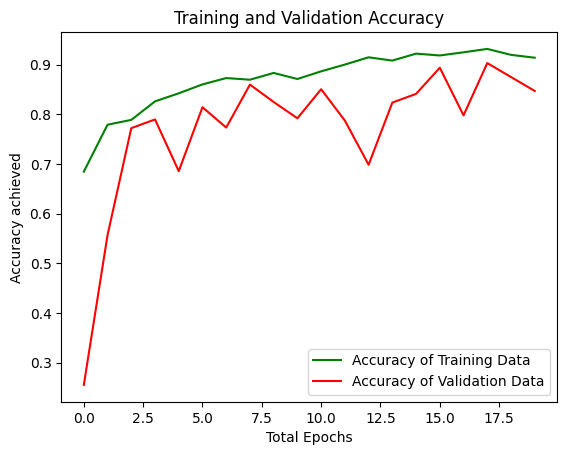

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy achieved')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

<ipython-input-9-45db7f286933>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


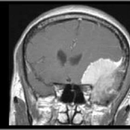

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
data = np.ndarray(shape=(1, 130, 130, 3), dtype=np.float32)
image = Image.open("/content/Testing/meningioma/Te-meTr_0000.jpg")
size = (130, 130)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

In [ ]:
prediction = cnn.predict(data)
print("Prediction (probabilities):", prediction)

# Get the index of the highest probability
predict_index = np.argmax(prediction)
print("Predicted class index:", predict_index)

# Map the index to the class name
predicted_class_name = classes[predict_index]
print("Predicted class name:", predicted_class_name)

1/1 [==============================] - 0s 18ms/step
Prediction (probabilities): [[8.0154058e-34 1.0000000e+00 3.2337386e-12 0.0000000e+00]]
Predicted class index: 1
Predicted class name: meningioma


In [ ]:
# Save the model
cnn.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
i=Image.open("/content/Testing/glioma/Te-glTr_0000.jpg")
i.size

(512, 512)